In [2]:
import numpy as np
from scipy import linalg
import exoplanet as xo
import multiband
import matplotlib.pyplot as pl
import celerite
from scipy.optimize import minimize
from tqdm import tqdm
import theano.tensor as tt

%matplotlib inline

In [3]:
log_S0 = 1
log_w0 = 2
log_Q = np.log(1/np.sqrt(2))

t = np.linspace(0, 1, 100)
kernel = xo.gp.terms.SHOTerm(log_S0=log_S0, log_w0=log_w0, log_Q=log_Q)
diag = [0.1, 0.01]
alpha = np.array([1, 2])
Q = alpha[None, :]*alpha[:, None]
diag = [d*np.ones_like(t) for d in diag]
mgp = xo.gp.GP(kernel, t, diag=diag, Q=Q)
gp = xo.gp.GP(kernel, t, diag=diag[0])

In [4]:
# see if direct cholesky decomposition matches celerite decomposition by computing both using the celerite matrices. 

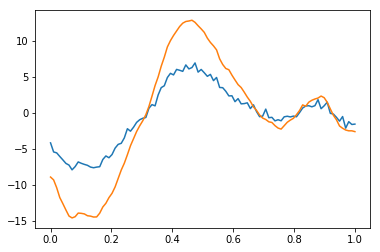

In [17]:
n = np.random.randn(200, 1)
y = mgp.dot_l(n).eval()
pl.plot(t, y[0::2])
pl.plot(t, y[1::2])